In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
os.chdir('..')

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1,2"

In [17]:
dataset_params = {
    'dataset': 'celeba64',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading celeba64 dataset...
Done!



In [18]:
%%time
from src.models.conv_vsc import ConvolutionalVariationalSparseCoding

model_params = {
    'dataset': 'celeba64',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 200,
    'learning_rate': 3e-4,
    
    'alpha': 0.01,
    'beta': 2,
    'beta_delta': 0,
    'c': 50,
    'c_delta': 1e-3,
    
    'device': 'cuda',
    'log_interval': 500,
    'normalize': False,
    'flatten': False,
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)

CPU times: user 20 ms, sys: 8 ms, total: 28 ms
Wall time: 21.7 ms


In [19]:
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 15, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

In [20]:
import logging

for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging.basicConfig(
    filename='notebooks/train.log',
    format='%(asctime)s - %(levelname)s - %(message)s', 
    datefmt='%d-%b-%y %H:%M:%S',
    level=logging.INFO
)

In [ ]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, 
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [24]:
train_losses = pd.DataFrame(convvsc.train_losses)

In [33]:
train_losses.tail()

,BCE,LOSS,PRIOR,prior1,prior2
56245,202054.281250,210172.187500,4058.949463,1228.844482,2830.104980
56246,205523.906250,213778.468750,4127.281738,1295.736572,2831.545166
56247,194377.593750,202579.109375,4100.755859,1269.428955,2831.326660
56248,202698.953125,210808.078125,4054.565430,1224.970703,2829.594727
56249,214584.328125,222682.531250,4049.099854,1219.661865,2829.437988


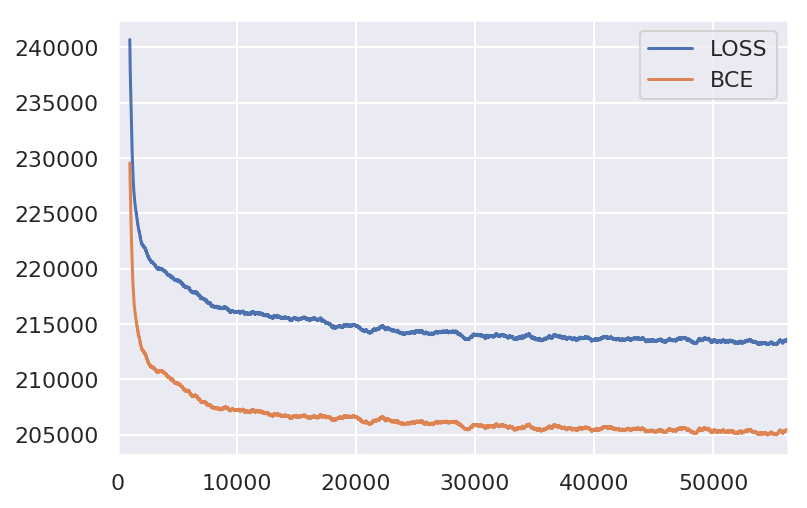

In [31]:
train_losses[['LOSS', 'BCE']].rolling(window=1000).mean().plot();

In [ ]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, start_epoch=16,
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [37]:
train_losses = pd.DataFrame(convvsc.train_losses)
train_losses.tail()

,BCE,LOSS,PRIOR,prior1,prior2
112495,202801.171875,210866.296875,4032.563965,1199.606934,2832.957031
112496,214184.750000,222336.546875,4075.900391,1241.564941,2834.335449
112497,195645.750000,203805.484375,4079.869141,1245.527954,2834.341309
112498,205810.437500,213891.984375,4040.772949,1207.873779,2832.899170
112499,199453.171875,207601.812500,4074.318359,1240.295776,2834.022461


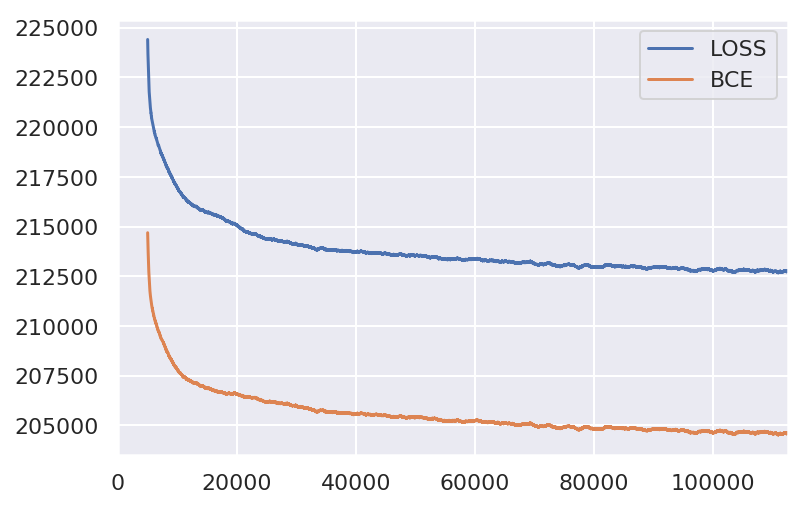

In [44]:
train_losses[['LOSS', 'BCE']].rolling(window=5000).mean().plot();

## 90 epochs

In [45]:
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 60, 
    'report_interval': 5,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

In [ ]:
%%time
try:
    convvsc.run_training(logging_func=logging.info, start_epoch=31,
                         **training_params)
except:
    logging.exception("Exception occurred")

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '
